In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        
filename='/kaggle/input/used-car-price-prediction/cardekho_data.csv'

df=pd.read_csv(filename)
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-car-price-prediction/cardekho_data.csv


In [2]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [20]:
## select columns needed
df=df[['Car_Name', 'Year', 'Selling_Price','Kms_Driven','Fuel_Type', 'Transmission']]
df[['Selling_Price','Kms_Driven']]

,Selling_Price,Kms_Driven
0,3.35,27000
1,4.75,43000
2,7.25,6900
3,2.85,5200
4,4.60,42450
...,...,...
296,9.50,33988
297,4.00,60000
298,3.35,87934
299,11.50,9000


In [22]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories='auto', sparse=False)

col=['Car_Name','Year','Fuel_Type','Transmission']

df_t=encoder.fit_transform(df[col])
encoded_columns = encoder.get_feature_names_out(col)

# Create DataFrame with one-hot encoded columns
df_encoded = pd.DataFrame(df_t, columns=encoded_columns)

# Concatenate with numerical columns
df_encoded = pd.concat([df_encoded, df[['Selling_Price','Kms_Driven']] ] ,axis=1)
df_encoded.columns
display(df_encoded)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Car_Name_800,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,Car_Name_Bajaj Avenger 220,Car_Name_Bajaj Avenger 220 dtsi,Car_Name_Bajaj Avenger Street 220,Car_Name_Bajaj Discover 100,...,Year_2016,Year_2017,Year_2018,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Selling_Price,Kms_Driven
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.35,27000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.75,43000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,7.25,6900
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.85,5200
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.60,42450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9.50,33988
297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.00,60000
298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.35,87934
299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,11.50,9000


In [23]:
from sklearn.model_selection import train_test_split

X=df_encoded.loc[ : , df_encoded.columns != 'Selling_Price'].values
y=df_encoded['Selling_Price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
from sklearn.metrics import accuracy_score

clf = DecisionTreeRegressor(max_depth=5, random_state=42)

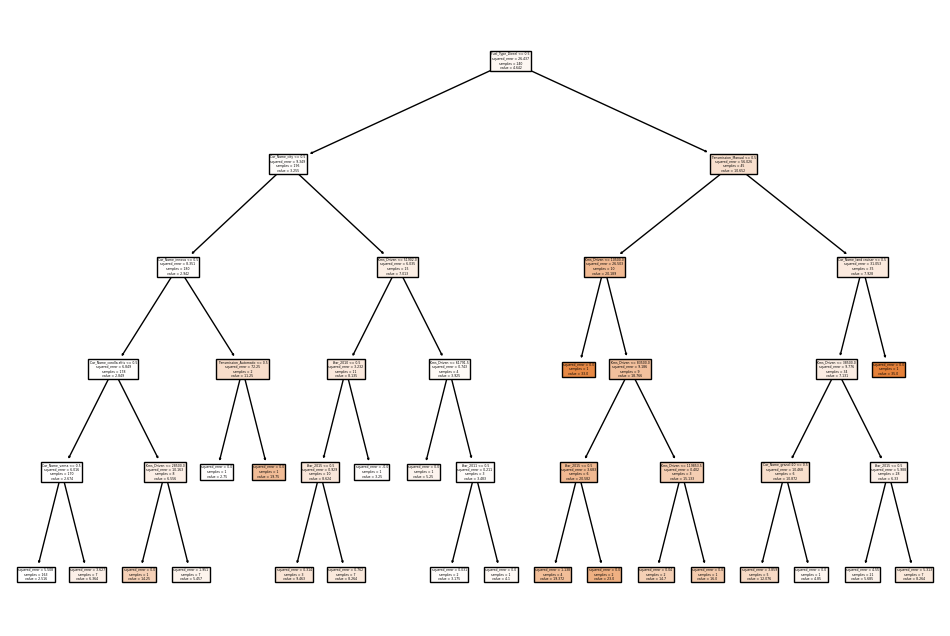

Decision Tree:
|--- Fuel_Type_Diesel <= 0.50
|   |--- Car_Name_city <= 0.50
|   |   |--- Car_Name_innova <= 0.50
|   |   |   |--- Car_Name_corolla altis <= 0.50
|   |   |   |   |--- Car_Name_verna <= 0.50
|   |   |   |   |   |--- value: [2.52]
|   |   |   |   |--- Car_Name_verna >  0.50
|   |   |   |   |   |--- value: [6.36]
|   |   |   |--- Car_Name_corolla altis >  0.50
|   |   |   |   |--- Kms_Driven <= 28500.00
|   |   |   |   |   |--- value: [14.25]
|   |   |   |   |--- Kms_Driven >  28500.00
|   |   |   |   |   |--- value: [5.46]
|   |   |--- Car_Name_innova >  0.50
|   |   |   |--- Transmission_Automatic <= 0.50
|   |   |   |   |--- value: [2.75]
|   |   |   |--- Transmission_Automatic >  0.50
|   |   |   |   |--- value: [19.75]
|   |--- Car_Name_city >  0.50
|   |   |--- Kms_Driven <= 51902.00
|   |   |   |--- Year_2010 <= 0.50
|   |   |   |   |--- Year_2015 <= 0.50
|   |   |   |   |   |--- value: [9.46]
|   |   |   |   |--- Year_2015 >  0.50
|   |   |   |   |   |--- value: [8.

<Figure size 640x480 with 0 Axes>

In [31]:
import matplotlib.pyplot as plt


clf.fit(X_train,y_train)
feature_names = df_encoded.columns[df_encoded.columns !='Selling_Price']

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=list(feature_names), filled=True)
plt.show()
plt.savefig('decision_tree.png', bbox_inches='tight')


tree_text = export_text(clf, feature_names=list(feature_names))
print("Decision Tree:")
print(tree_text)